In [1]:
import numpy as np
import pandas as pd
volume = pd.read_csv("../data/销售量按日期品类合并.csv",encoding='utf-8',index_col='销售日期')
price = pd.read_csv("../data/各品类每日单价.csv",encoding='utf-8',index_col='销售日期')

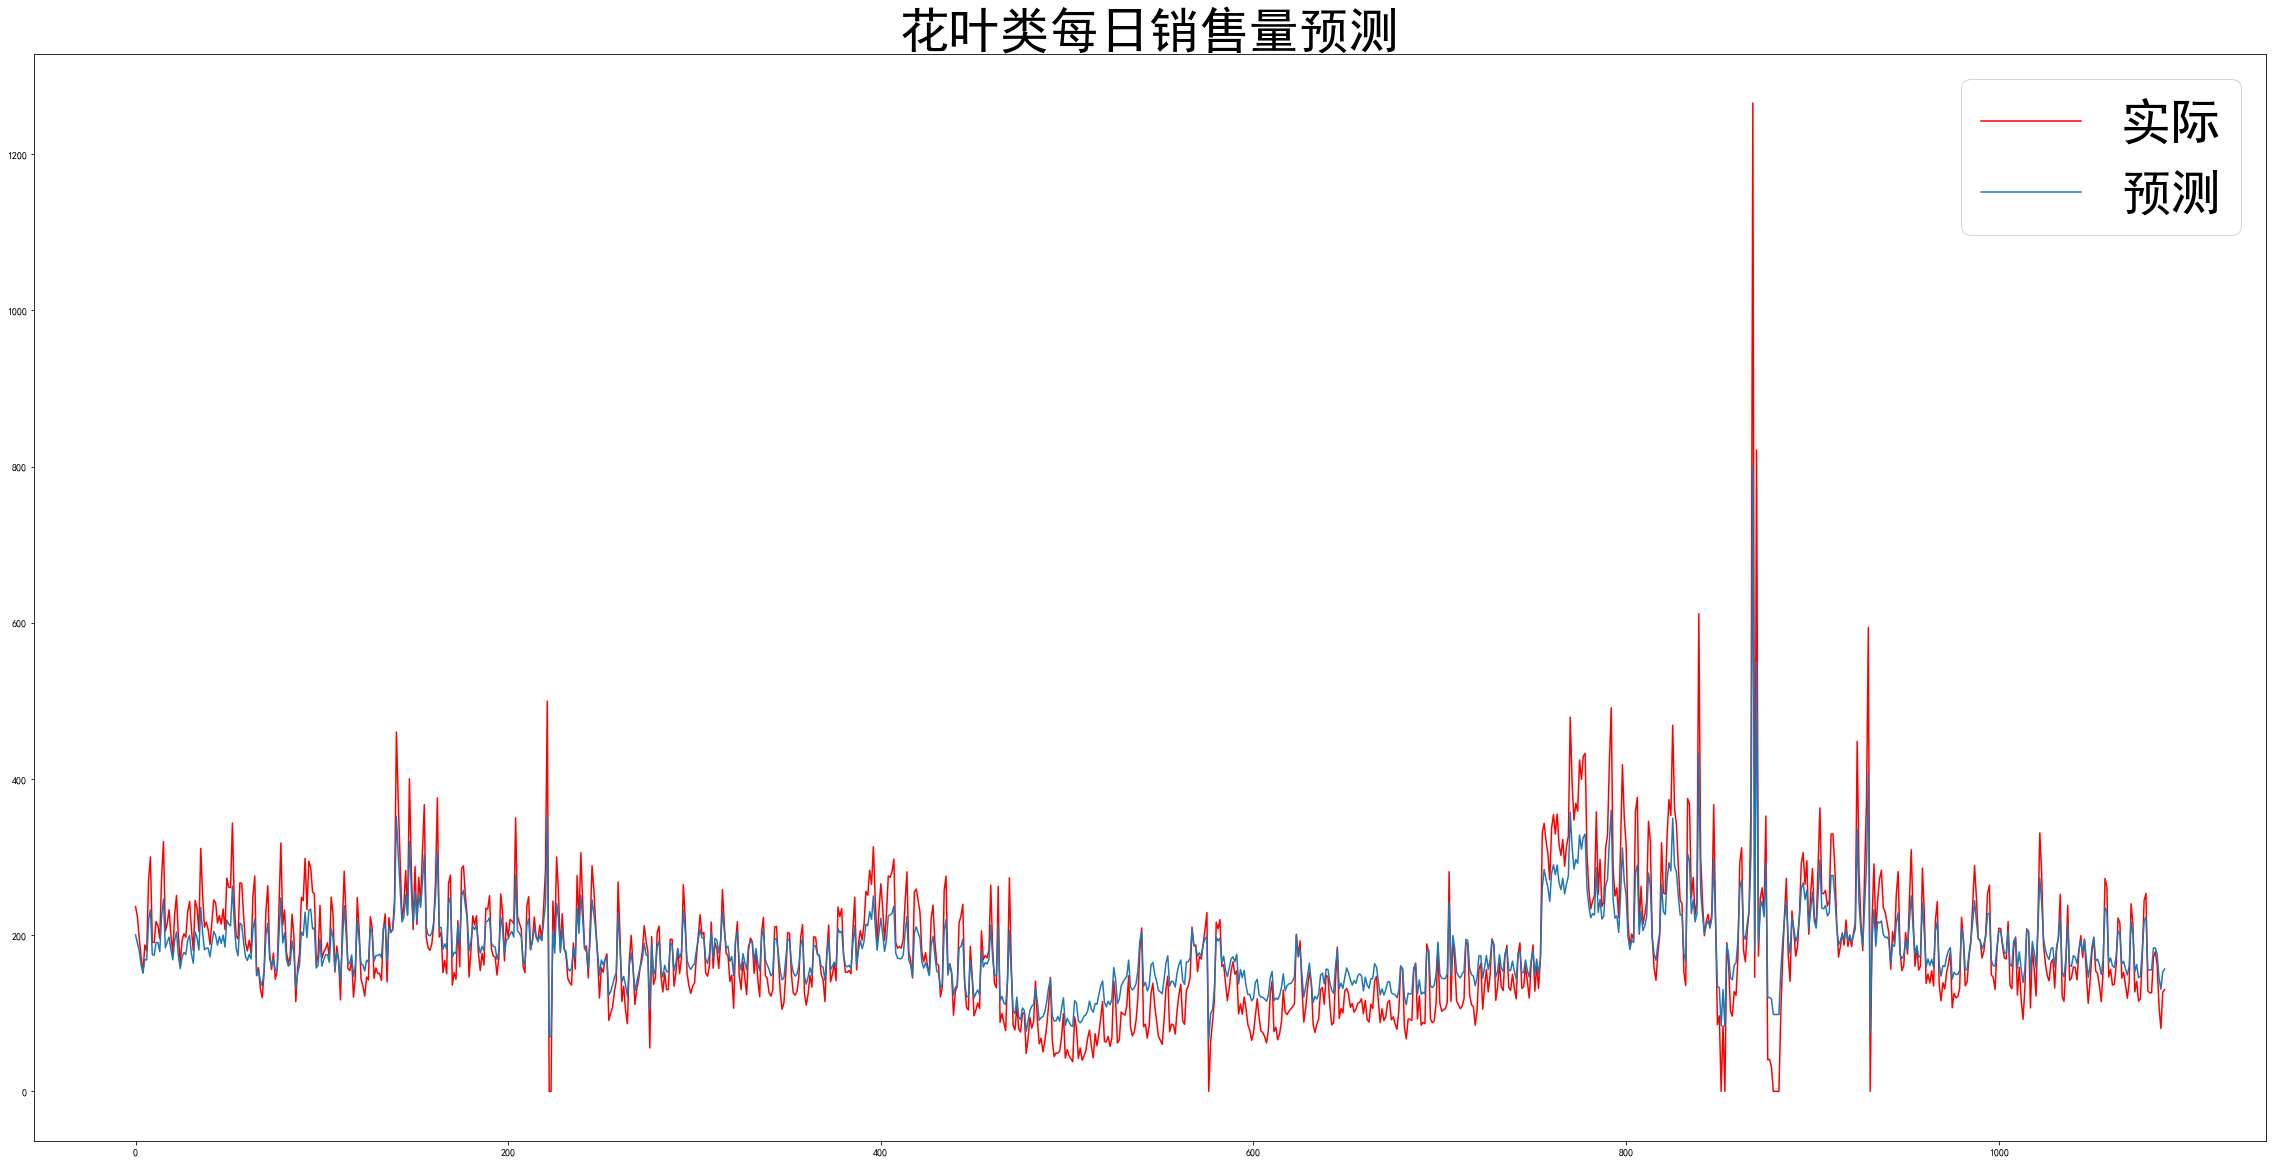

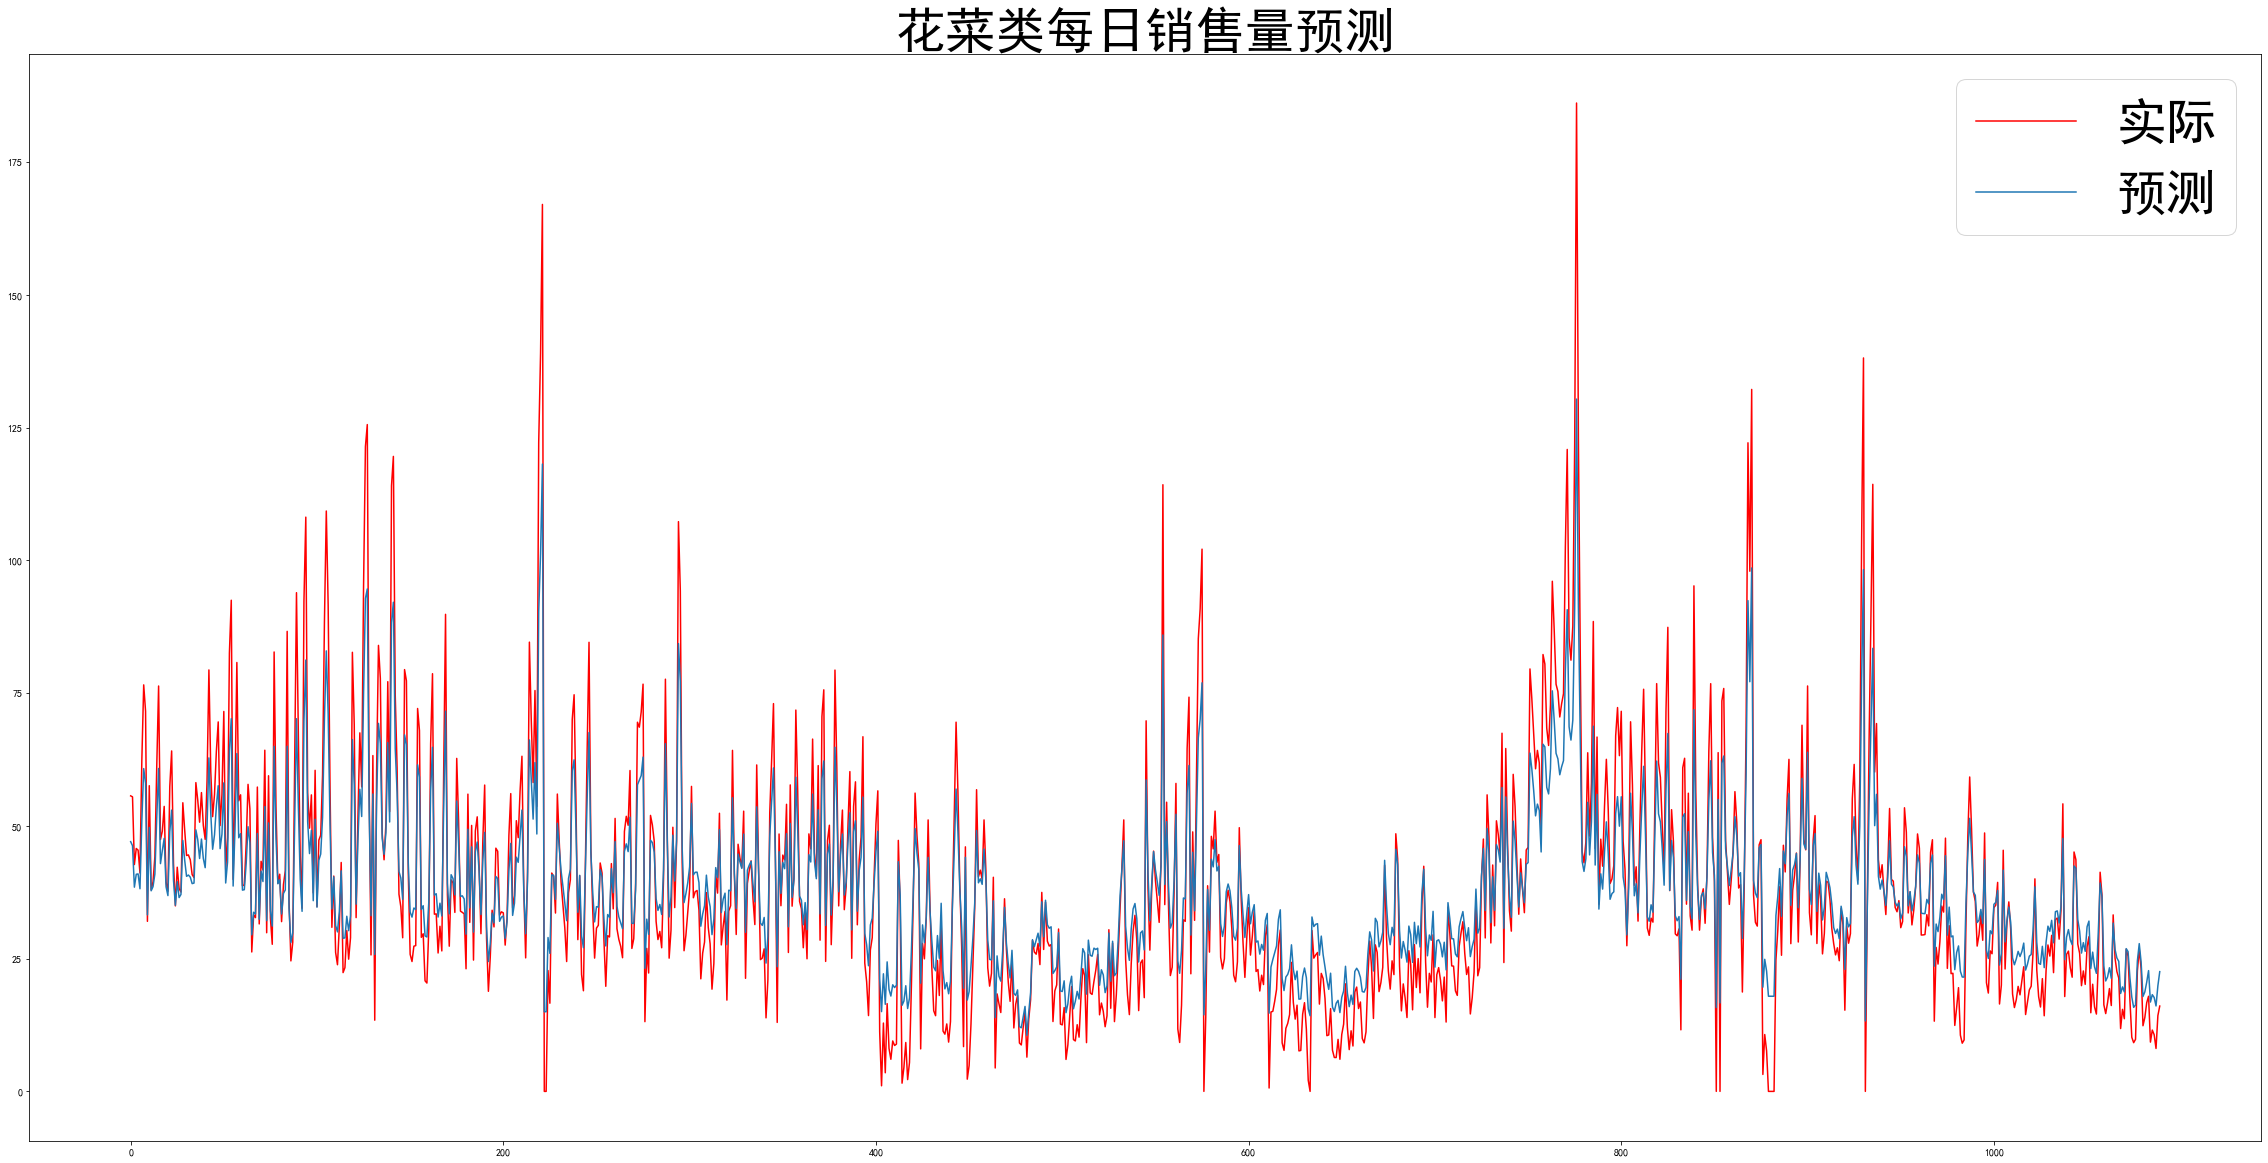

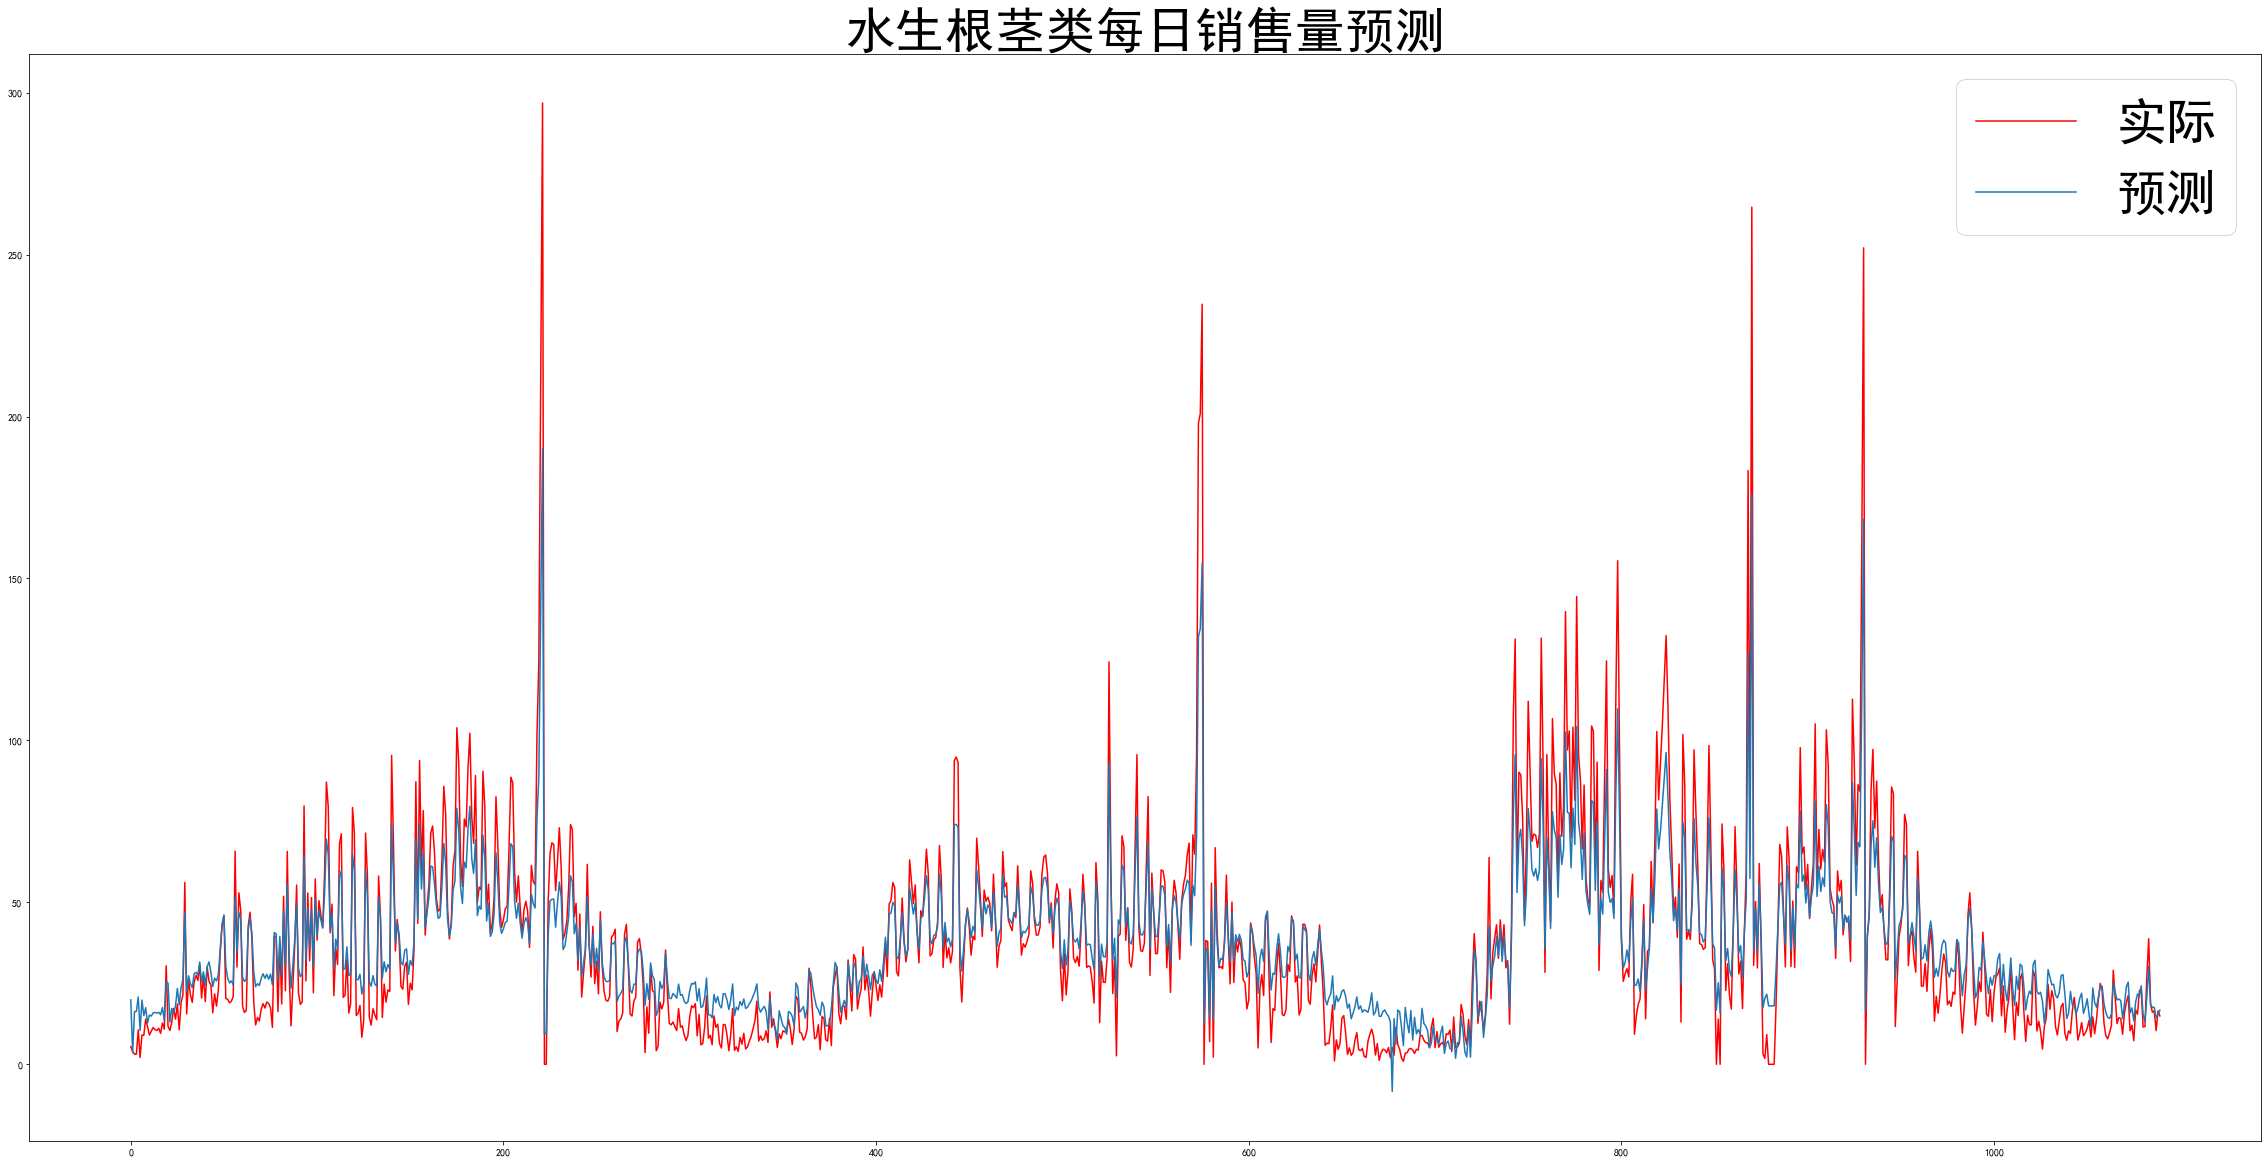

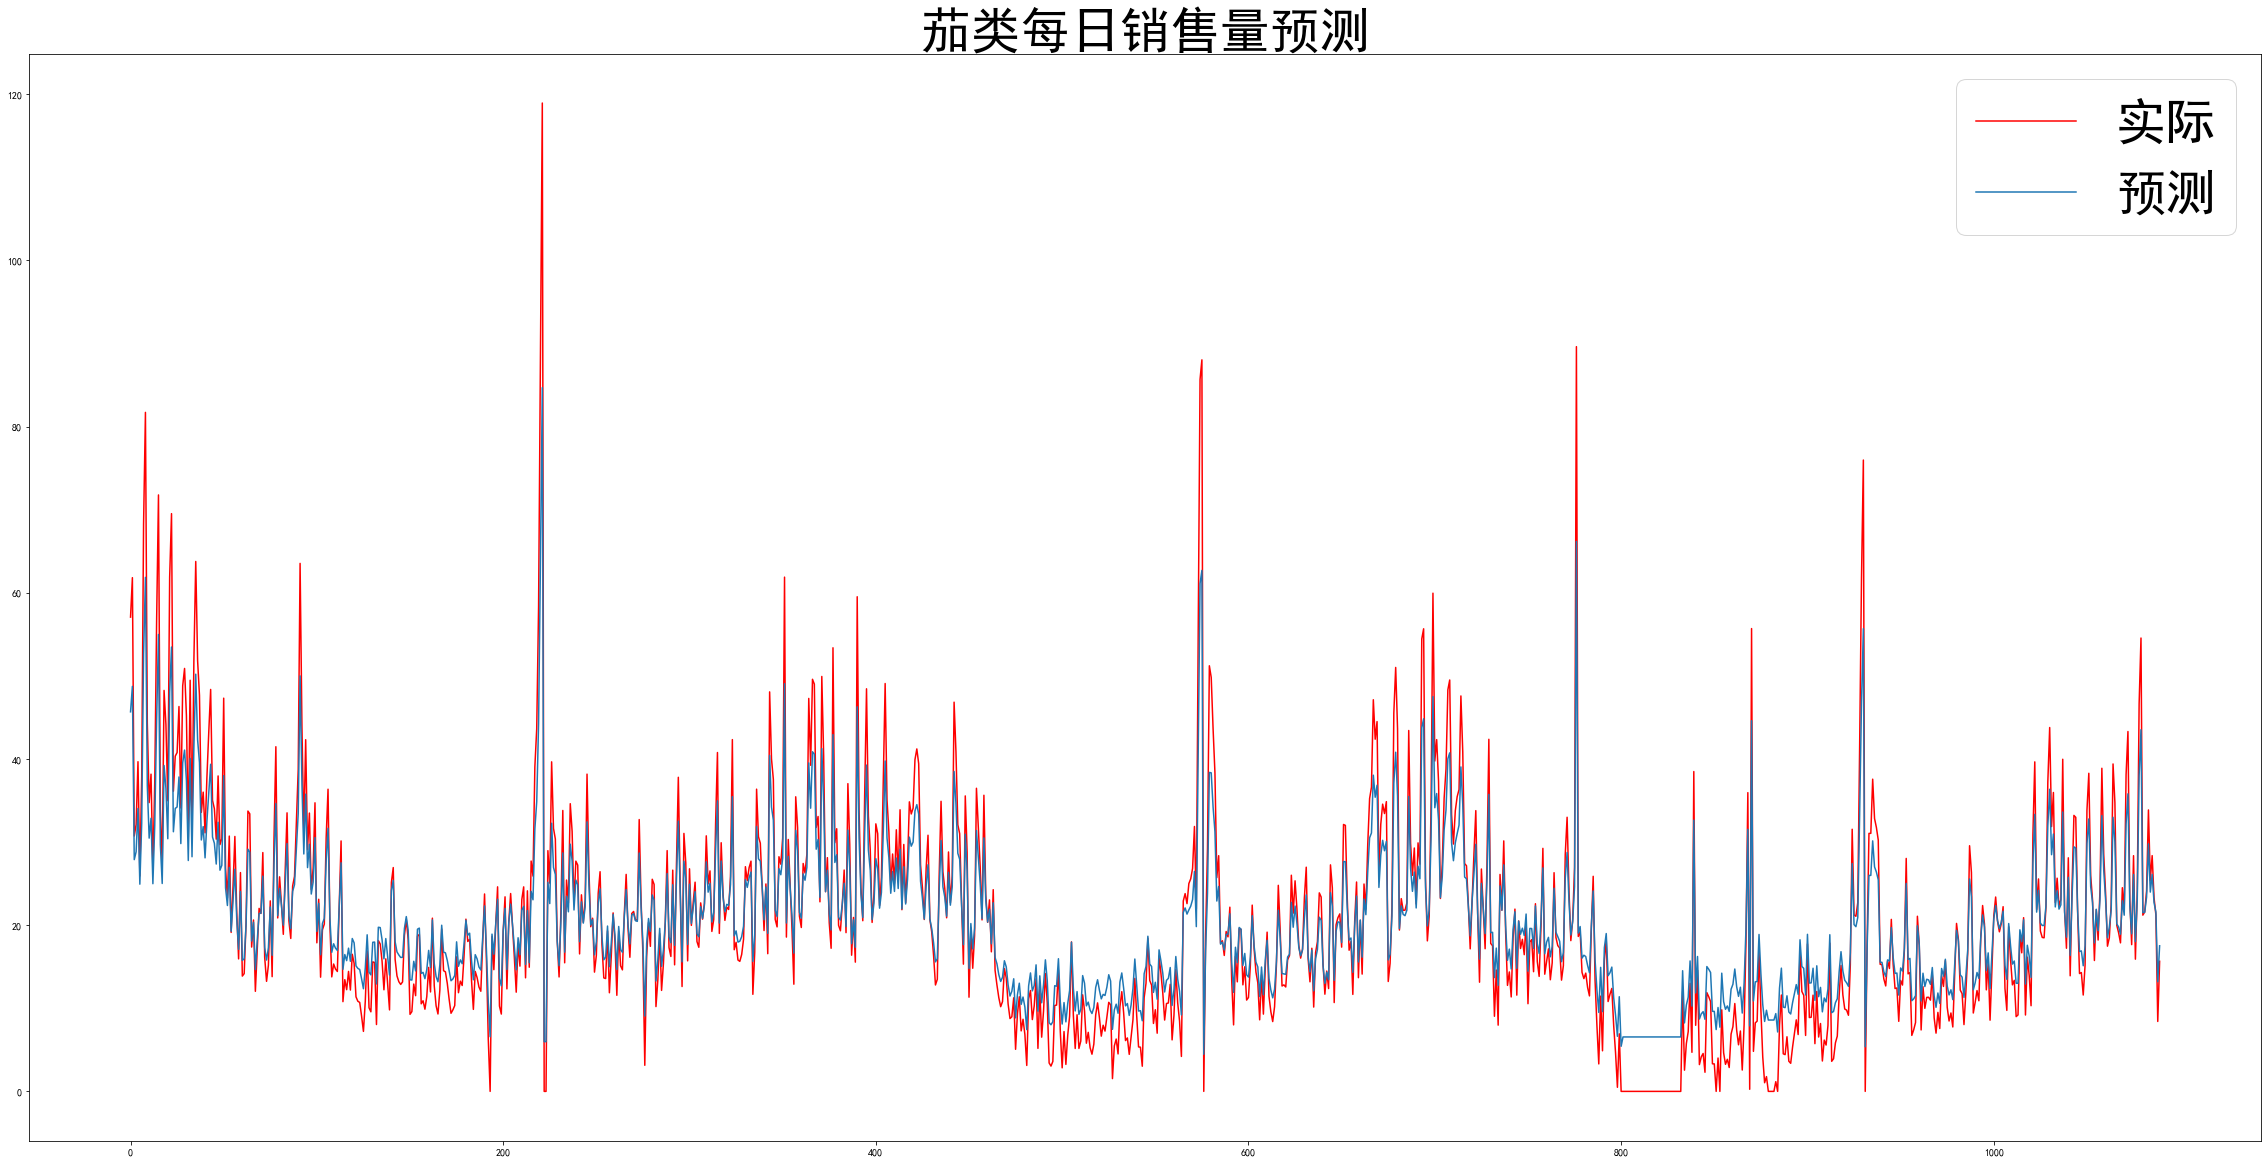

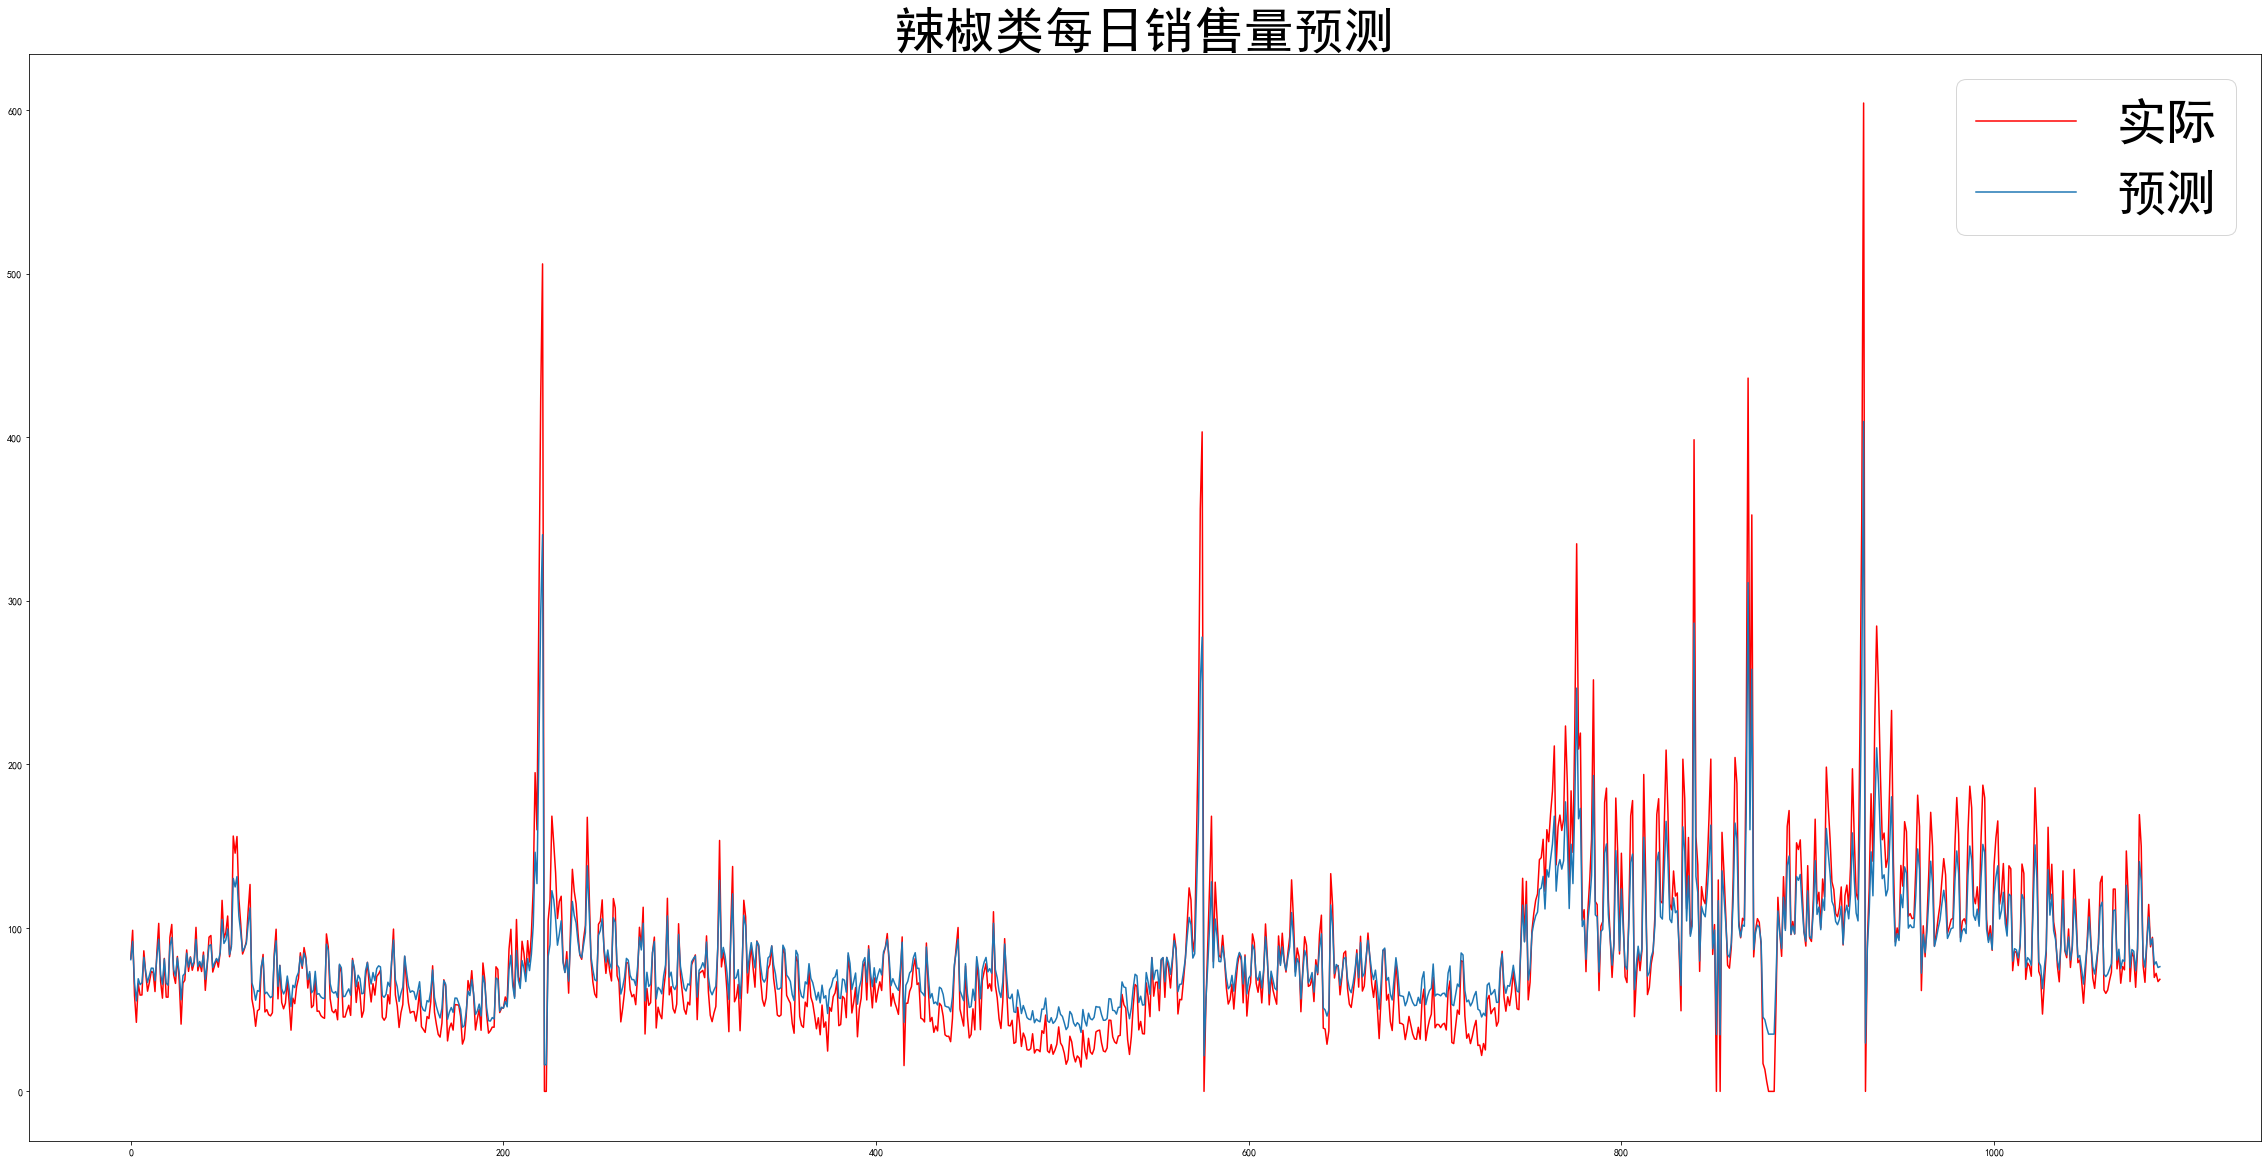

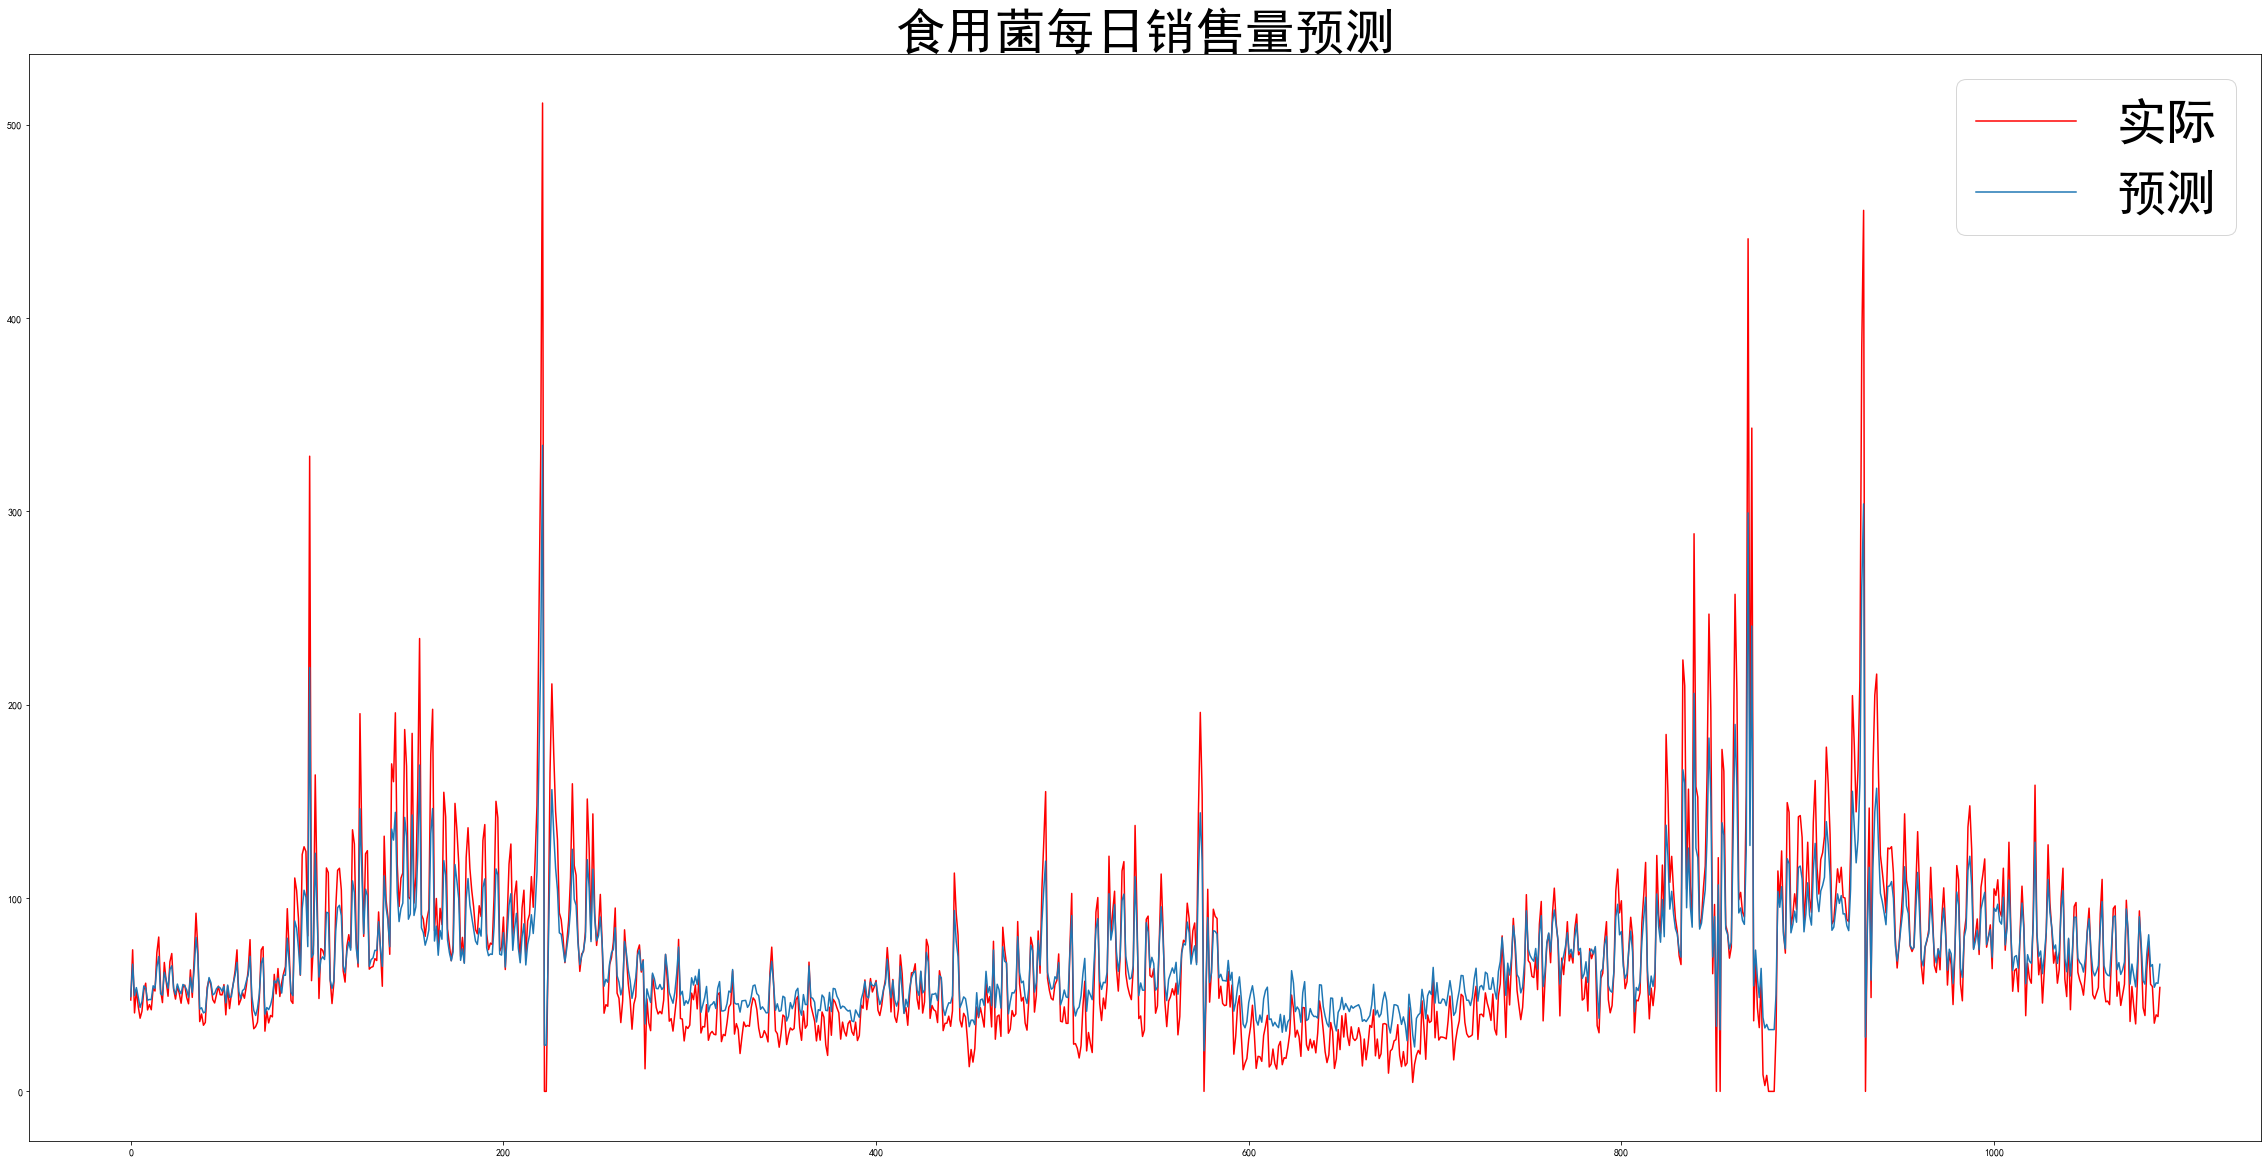

In [2]:
LAG = pd.DataFrame(data = [1,1,1,1,1,1], index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['lag'])
from statsmodels.tsa.api import VAR
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    maxlags = LAG.loc[types]['lag']
    VAR_data = []
    VAR_data.append(price[types].values[:-maxlags])
    VAR_data.append(volume[types].values[maxlags:])
    VAR_data = pd.DataFrame(VAR_data).T
    #print(VAR_data)
    model = VAR(VAR_data)

    results = model.fit(maxlags=maxlags, ic='aic')
    results.summary()


    import matplotlib.pyplot as plt
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    lag_order = results.k_ar
    y1 = []
    y2 = []
    count = 0
    n,m = VAR_data.shape
    # 用i枚举每一天
    for i in range(n-maxlags-1):
        # 制作输入
        forecast_input = VAR_data.values[i:i+maxlags]
        # 往前预测一天
        forecast = results.forecast(forecast_input, steps=1)
        # 将预测结果加入数组中
        y1.append(forecast[0][1])
        # y2中存储的原本的值
        y2.append(VAR_data.values[i+maxlags+1][1])
        # 将两者和阈值进行比较
        if abs(forecast[0][1]-VAR_data.values[i+maxlags+1][1]) < 0.17*1e9:
            count +=1

    # 输出正确率
    #print(count/(n-maxlags))
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    fig = plt.figure(figsize=(40,20))
    # 手动对齐
    plt.title(types+'每日销售量预测',fontsize = 50)
    plt.plot(y2[:-2],'r', label = '实际')
    plt.plot(y1[2:],label = '预测')
    plt.legend(fontsize = 50)
    plt.savefig('../data/preLineCharts/'+types+'每日销售量预测'+'.jpg')
    plt.show()


In [3]:
LAG = pd.DataFrame(data = [1,1,1,1,1,1], index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['lag'])
volume_pre = pd.DataFrame([])
volume_pre['销售日期']=pd.date_range(start='2023-07-01', end='2023-07-07', freq='D')
volume_pre = volume_pre.set_index('销售日期')
from statsmodels.tsa.api import VAR
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    maxlags = LAG.loc[types]['lag']
    VAR_data = []
    VAR_data.append(price[types].values[:-maxlags])
    VAR_data.append(volume[types].values[maxlags:])
    VAR_data = pd.DataFrame(VAR_data).T
    #print(VAR_data)
    model = VAR(VAR_data)

    results = model.fit(maxlags=maxlags, ic='aic')
    results.summary()

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    lag_order = results.k_ar

    count = 0
    n,m = VAR_data.shape
    # 制作输入
    forecast_input = VAR_data.values[-maxlags-1:]
    #print(forecast_input)
    # 往前预测7天
    forecast = results.forecast(forecast_input, steps=7)
    forecast = pd.DataFrame(forecast)[1]
    #print(forecast)
    volume_pre[types] = forecast.values
print(volume_pre)
volume_pre.to_csv('../data/销售量未来一周预测.csv',sep=',',encoding='utf_8_sig')

                   花叶类        花菜类      水生根茎类         茄类        辣椒类        食用菌
销售日期                                                                         
2023-07-01  158.529805  29.928016  18.206689  23.538352  85.000221  57.691481
2023-07-02  173.694791  31.152475  19.053572  22.863389  86.648565  66.840241
2023-07-03  181.767325  31.998033  20.778435  22.398213  87.626106  71.164567
2023-07-04  185.947824  32.608832  22.776593  22.072331  88.182165  72.948485
2023-07-05  187.999296  33.072399  24.751552  21.839241  88.474061  73.439519
2023-07-06  188.892515  33.441977  26.569578  21.668248  88.601039  73.310462
2023-07-07  189.161645  33.750045  28.181205  21.539079  88.625691  72.917132
